In [1]:
import glob
import numpy as np
from PIL import Image
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
Path = '/media/nbm/New Volume/Msc_courses/ML-BDU/SWE_PPT/Sample_codes/Image-ethio-digit/'
imagePath = sorted(glob.glob(Path + '/*.bin.png'))
textPath = sorted(glob.glob(Path + '/*.gt.txt'))
print (len(imagePath))
out = open("/media/nbm/New Volume/Msc_courses/ML-BDU/SWE_PPT/Sample_codes/Image-ethio-digit/digit.txt", "w")
for name in textPath:
    with open(name) as f:
        for line in f:
            #if line in (special) or line == " ": continue
            #print(line.decode('utf-8').split())
            out.write(line)
out.close()




400


In [3]:
text =open('/media/nbm/New Volume/Msc_courses/ML-BDU/SWE_PPT/Sample_codes/Image-ethio-digit/digit.txt','r').read().split('\n')

In [5]:
img_rows=28
img_cols=28
newsize=(img_rows, img_cols)

In [6]:
def im_resize(myimage):
    myimage = cv2.resize(myimage, newsize)
    return myimage

In [7]:
image = [np.array(Image.open(i), 'f') for i in imagePath]

In [9]:
image[5].shape

(63, 42)

In [10]:
img = []
for i in image:
    img.append(im_resize(i))  


In [11]:
im_array=np.array(img)

In [13]:
im_array[5].shape

(28, 28)

In [14]:
label=[]
for i in text:
    if i==" " or i=='' or i=='\n':continue
    label.append(i)

In [15]:
label_array=np.array(label)

In [17]:
label_array[:15]

array(['፯', '፰', '፮', '፫', '፭', '፭', '፪', '፲', '፮', '፪', '፬', '፪', '፱',
       '፲', '፬'], dtype='<U1')

In [18]:
print(im_array.shape)
print(label_array.shape)

(400, 28, 28)
(400,)


'፬'

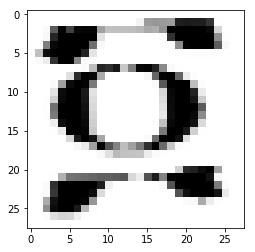

In [19]:
#plt.imshow(im_array[1]) # to diplay the  sample image with yellow background since it used colormap to map intensity to color.
plt.imshow(im_array[10],cmap='Greys_r')# todisply the backgrouund to be white
label[10]#to display label

In [20]:
data, labels = shuffle(im_array, label_array, random_state=2)


In [21]:
np.save('/media/nbm/New Volume/Msc_courses/ML-BDU/SWE_PPT/Sample_codes/numpy_digit_dataset_model/x_train_digit',data)
np.save('/media/nbm/New Volume/Msc_courses/ML-BDU/SWE_PPT/Sample_codes/numpy_digit_dataset_model/y_train_digit',labels)


In [22]:
x_train_digit=np.load('/media/nbm/New Volume/Msc_courses/ML-BDU/SWE_PPT/Sample_codes/numpy_digit_dataset_model/x_train_digit.npy')
y_train_label=np.load('/media/nbm/New Volume/Msc_courses/ML-BDU/SWE_PPT/Sample_codes/numpy_digit_dataset_model/y_train_digit.npy')


In [23]:
x_train_digit.shape

(400, 28, 28)

In [24]:
y_train_label.shape

(400,)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_train_digit, y_train_label, test_size=0.2)

In [27]:
x_train.shape

(320, 28, 28)

In [28]:
x_train_reshape=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test_reshape=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [29]:
x_train_reshape.shape

(320, 784)

In [30]:
#ovr and ovo SVM classification
from sklearn import svm
model_digit = svm.SVC(kernel='linear', C = 1.0, decision_function_shape='ovR')
model_digit.fit(x_train_reshape, y_train) 


# hinge_loss
model_hinge = svm.LinearSVC()
model_hinge.fit(x_train_reshape, y_train) 

/home/nbm/.local/lib/python3.5/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [31]:
result = model_digit.score(x_test_reshape, y_test)
result_hinge = model_hinge.score(x_test_reshape, y_test)

In [32]:
# to save and load model
import pickle
filename = '/media/nbm/New Volume/Msc_courses/ML-BDU/SWE_PPT/Sample_codes/numpy_digit_dataset_model/model_digit.sav'
pickle.dump(model_digit, open(filename, 'wb'))



In [33]:
# load the model from disk
loaded_model_digit = pickle.load(open(filename, 'rb'))

In [34]:
resut=loaded_model_digit.score(x_test_reshape, y_test)

In [35]:
print(model_digit.predict(x_test_reshape[:40]))
print(y_test[:40])

['፪' '፪' '፫' '፰' '፬' '፰' '፭' '፩' '፰' '፯' '፬' '፭' '፭' '፮' '፱' '፫' '፭' '፩'
 '፮' '፮' '፲' '፲' '፩' '፪' '፰' '፮' '፱' '፫' '፮' '፭' '፲' '፲' '፩' '፩' '፬' '፫'
 '፱' '፮' '፱' '፫']
['፪' '፪' '፫' '፰' '፬' '፰' '፭' '፩' '፰' '፯' '፬' '፱' '፭' '፮' '፱' '፩' '፱' '፩'
 '፯' '፮' '፲' '፫' '፮' '፪' '፰' '፮' '፱' '፫' '፮' '፭' '፲' '፲' '፩' '፩' '፬' '፫'
 '፱' '፯' '፰' '፫']


In [32]:
y_pred = model_digit.predict(x_test_reshape)
y_test_class = y_test
y_pred_class = y_pred
#Accuracy of the predicted values


In [48]:
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support


              precision    recall  f1-score   support

           ፩       0.90      0.82      0.86        11
           ፪       1.00      0.80      0.89         5
           ፫       0.64      0.88      0.74         8
           ፬       0.83      0.71      0.77         7
           ፭       0.83      0.56      0.67         9
           ፮       0.75      1.00      0.86         6
           ፯       0.75      0.75      0.75         8
           ፰       0.80      0.80      0.80        10
           ፱       0.67      1.00      0.80         6
           ፲       0.88      0.70      0.78        10

    accuracy                           0.79        80
   macro avg       0.80      0.80      0.79        80
weighted avg       0.81      0.79      0.79        80



In [33]:
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)

[[ 7  0  0  1  0  0  0  0  1  1]
 [ 0  5  0  0  0  0  0  0  0  0]
 [ 0  0  7  1  0  0  0  0  1  0]
 [ 0  0  0  6  0  0  0  0  0  0]
 [ 1  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  9  1  0  0  0]
 [ 0  0  1  0  0  0  6  0  0  0]
 [ 1  0  0  0  0  0  1 13  1  0]
 [ 0  0  0  1  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0  8]]


In [34]:
from sklearn.neighbors import KNeighborsClassifier


In [35]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_reshape, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [36]:
print(neigh.predict(x_test_reshape[:3]))


['፬' '፰' '፮']


In [37]:
print(neigh.predict_proba([x_train_reshape[2]]))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [38]:
print(y_test[:3])

['፬' '፰' '፮']
